In [37]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [38]:

# model_directory = 'saved_models'
# model_filename = 'linear_regression_model.pth'
# model_file_path = os.path.join(model_directory, model_filename)

# # Ensure the directory exists, create it if it doesn't
# os.makedirs(model_directory, exist_ok=True)
# # Function to load or initialize the model
# def load_or_initialize_model(X_train, y_train):

#     # Load the model if it exists, otherwise initialize a new model
#     if os.path.exists(model_file_path):
#         print('Model exist so using it')
#         # input_size = X_train.shape[1]
#         # model = nn.Linear(input_size, 1).double()
#         # torch.save(model, model_file_path)
#         model = torch.load(model_file_path)
#     else:
#         print('Model does not exist so initialising from scratch')
#         input_size = X_train.shape[1]
#         model = nn.Linear(input_size, 1).double()
#         torch.save(model, model_file_path)
#     return model

In [39]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
        loss = criterion(outputs, y_train.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [40]:
#function to test the model

def modeltest(X_test,y_test,model):
    print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    print(f'Percentage Accuracy: {mean_accuracy:.2f}%')

    #loop used to extract few records for prediction of model on new data points
    # for i in range(8):
    #     print("prediction=",predictions[i],"target=",y_test[i],X_test[i][0])
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [83]:

def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
    # feature_to_plot1 = X[:,0] 
    # feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [42]:





#Data  proccessing and normalisation tried

df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')






# Define a mapping from categories to numerical values
category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
df['X3'] = df['X3'].map(category_mapping)

# Separate the target variable 'y' from the input features.
X = df.drop(columns=['y'])
y = df['y']

for column in X.columns:
    try:
        X[column] = X[column].astype(float)
    except ValueError:
        print(f"Column '{column}' cannot be converted to float.")



# Convert the DataFrame to a PyTorch tensor.
X = torch.tensor(X.values, dtype=torch.float64)
# Convert the target variable to a PyTorch tensor.
y = torch.tensor(y.values, dtype=torch.float64)
X1=X



size=len(X)
train_ratio=0.7
train_size=int(size*train_ratio)
test_size=size-train_size


#Splitting the data in training and testing data 


#Training data
X_train=X[:train_size]
y_train=y[:train_size]

#Testing data
X_test=X[train_size:]
y_test=y[train_size:]

In [43]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

# Extract the covariance between the two variables from the covariance matrix


# print("Covariance between input1 and input2:", covariance)

covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.3417279756200555
Epoch [200/1000], Loss: 4.0691619269648385
Epoch [300/1000], Loss: 3.969952414204665
Epoch [400/1000], Loss: 3.9305452083898746
Epoch [500/1000], Loss: 3.912897328258626
Epoch [600/1000], Loss: 3.9038318986649903
Epoch [700/1000], Loss: 3.8985634651024315
Epoch [800/1000], Loss: 3.8952132521828253
Epoch [900/1000], Loss: 3.8929571077314287
Epoch [1000/1000], Loss: 3.891383737508364
Training Done
torch.Size([90, 3])
torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 24.44%
Mean Absolute Error: 1.499541055859097
Mean Squared Error: 3.613472152181777
R-squared: 0.9604993877435242
weight: [[3.03750996 2.05365957 0.08571917]]
bias: [-0.34227782]
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


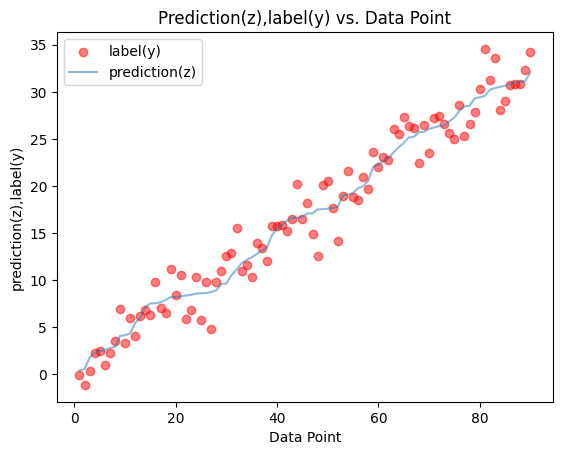

Linear(in_features=3, out_features=1, bias=True)


In [77]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)
model=None
def train_with_selected_features(drop_features=[]):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    
    #Data  proccessing and normalisation tried

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.

    drop_features.append('y')
    X = df.drop(columns=drop_features)
    # X = df.drop(columns=['y'])
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

    print(type(y_test))
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    pred=tester()
    # print(X_test.shape,y_test.shape,pred.shape)
    print(type(y_test))
    print(type(pred))
    for i in [X_test,y_test,pred]:
    # for i in [X_test]:
        print(i.shape)
    create_plot(X_test,y_test,pred)
    
    print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [61]:
#Function  to remove any one features and train the model

def remove_one_feature(feature1):
    #Data  proccessing and normalisation tried

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if(feature1!='X3'):
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.
    X = df.drop(columns=['y',feature1])
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    global X_test
    X_test=X[train_size:]
    y_test=y[train_size:]

    global model
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01)  # You can adjust the regularization st

    pred=modeltest(X_test,y_test,model)
    print(type(pred))
    create_plot(X_test,y_test,pred)
    
    # return X_test
    


In [84]:
#Function  to remove any two features and train the model

def remove_two_feature(feature1,feature2):

    #Data  proccessing and normalisation tried
    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')
    global X_test



   

    # Define a mapping from categories to numerical values
    if(feature1!='X3' and feature2!='X3'):
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.
    X = df.drop(columns=['y',feature1,feature2])
    y = df['y']
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X
   

    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    X_test=X[train_size:]
    y_test=y[train_size:]

    global model
    model=modeltrain(X_train, y_train,l2_lambda=0.01)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    pred=tester()
    print(X_test.shape)
    print(y_test.shape)
    print(pred.shape)
    create_plot(X_test,y_test,pred)
    


Linear(in_features=1, out_features=1, bias=True)
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 91.98824863966311
Epoch [200/1000], Loss: 85.45767130013795
Epoch [300/1000], Loss: 82.43360870214208
Epoch [400/1000], Loss: 80.82872221776837
Epoch [500/1000], Loss: 79.88824746167704
Epoch [600/1000], Loss: 79.30246740035142
Epoch [700/1000], Loss: 78.92456513771762
Epoch [800/1000], Loss: 78.67557108935732
Epoch [900/1000], Loss: 78.50911200441624
Epoch [1000/1000], Loss: 78.39649727447923
Training Done
torch.Size([90, 2])
torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 4.44%
Mean Absolute Error: 8.406052072968771
Mean Squared Error: 92.74344144596337
R-squared: -0.013823426776993886
weight: [[4.16667366 0.79094324]]
bias: [12.10319994]
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 2])
torch.Size([90])
torch.Size([90, 1])


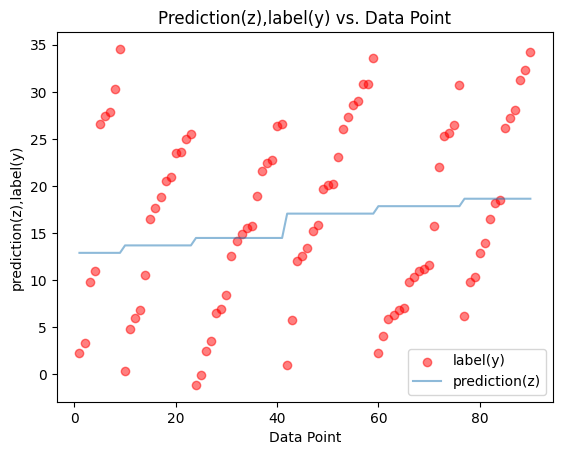

Linear(in_features=2, out_features=1, bias=True)
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 97.95901870975314
Epoch [200/1000], Loss: 91.38164810005466
Epoch [300/1000], Loss: 87.48414893597129
Epoch [400/1000], Loss: 85.16391481186346
Epoch [500/1000], Loss: 83.77459219419211
Epoch [600/1000], Loss: 82.93666175952637
Epoch [700/1000], Loss: 82.42680906046186
Epoch [800/1000], Loss: 82.11327480933058
Epoch [900/1000], Loss: 81.91804798100527
Epoch [1000/1000], Loss: 81.79473606541765
Training Done
torch.Size([90, 1])
torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 3.33%
Mean Absolute Error: 8.345477694845478
Mean Squared Error: 94.51031269956717
R-squared: -0.033137951244430974
weight: [[0.75126642]]
bias: [14.2733025]
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 1])
torch.Size([90])
torch.Size([90, 1])


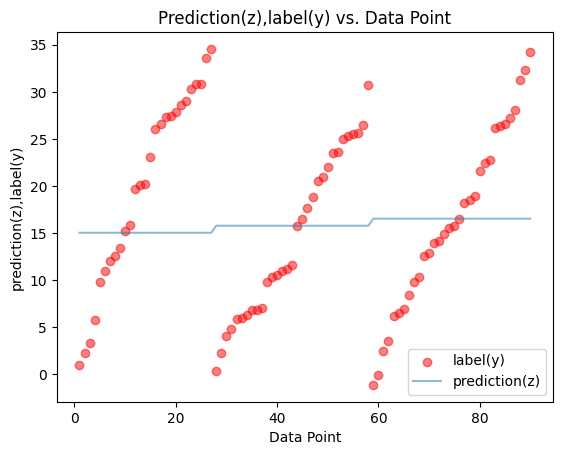

Linear(in_features=1, out_features=1, bias=True)


In [90]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.
# remove_one_feature('X3')
print(model)
train_with_selected_features()
train_with_selected_features('X1')
train_with_selected_features(['X2','X1'])
# all

In [63]:

def tester(testing_row=None):
   
    if testing_row is None:
        print(X_test.shape)
        print(y_test.shape)
        # pred=0
        pred=modeltest(X_test,y_test,model)
        
    else:
        
        print(X_test[testing_row].shape)
        print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print(x1.shape)
        print(y1.shape)
        pred=0
        pred=modeltest(x1,y1,model)
        pred1=pred.item()
        print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round((y1-pred1)*100/y1,2),"%")
        print("---------------------------------------------------------")
    # print(type(pred))
    return pred
        

print()
tester()



torch.Size([90, 2])
torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 23.33%
Mean Absolute Error: 1.5111385955325216
Mean Squared Error: 3.6370636335392597
R-squared: 0.9602414978474875
weight: [[3.04060209 2.04649099]]
bias: [-0.19046993]


tensor([[31.9683],
        [ 8.4510],
        [19.9711],
        [ 7.8161],
        [ 0.4374],
        [22.8688],
        [ 9.5400],
        [13.5156],
        [17.6979],
        [25.0784],
        [18.9344],
        [26.3434],
        [ 8.1269],
        [26.1214],
        [ 7.5005],
        [30.8266],
        [22.7598],
        [ 8.4088],
        [28.6153],
        [22.0319],
        [ 9.5774],
        [ 8.3420],
        [17.6124],
        [ 2.6363],
        [ 8.1644],
        [14.7690],
        [13.2330],
        [15.9515],
        [ 8.2511],
        [17.6513],
        [26.0759],
        [ 5.4297],
        [17.5875],
        [ 5.8717],
        [23.6529],
        [11.8521],
        [17.0017],
        [ 7.4288],
        [ 4.2138],
        [16.6959],
        [12.6688],
        [30.4508],
        [25.1265],
        [24.6199],
        [27.2881],
        [ 2.3461],
        [16.5995],
        [17.5811],
        [31.1047],
        [ 8.6926],
        [ 7.1322],
        [ 2.8591],
        [ 0.